In [1]:
# Simulation of particle decay
# Designed for use in the University of Chicago Physics 211 course
# Written 9/17/2019 by Kevin Van De Bogart

import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook 


add_chance = 0.5
decay_chance = 0.01
time_range = 500
hist_bins = np.linspace(1,time_range,time_range)
rebin_factor = 2
    # this is all the decay related stuff: 
    # add_chance is the probability that a particle will be added to the simulation in one time step
    # decay_chance is the probability that a particle decays in a timestep
    # time_range sets how far out the x (time) axis goes 
        # picking too small of a value will result in data overflowing the chart edge, but it is still there.
    # hist_bins sets up a series of time_range+1 values [0,1,2,...,time_range], 
    # rebin_factor defines how many bins to collapse together when rebinning


t_end = time.time() + 60
    # this sets the sim to run for 60 seconds of real time
frame_skip = 1
    # this sets the delay between re-drawing results
    # setting this to 1 shows every single step
    # higher values make the simulation run much faster

    # the while statement starts the loop for the simulation

Setup done


<IPython.core.display.Javascript object>


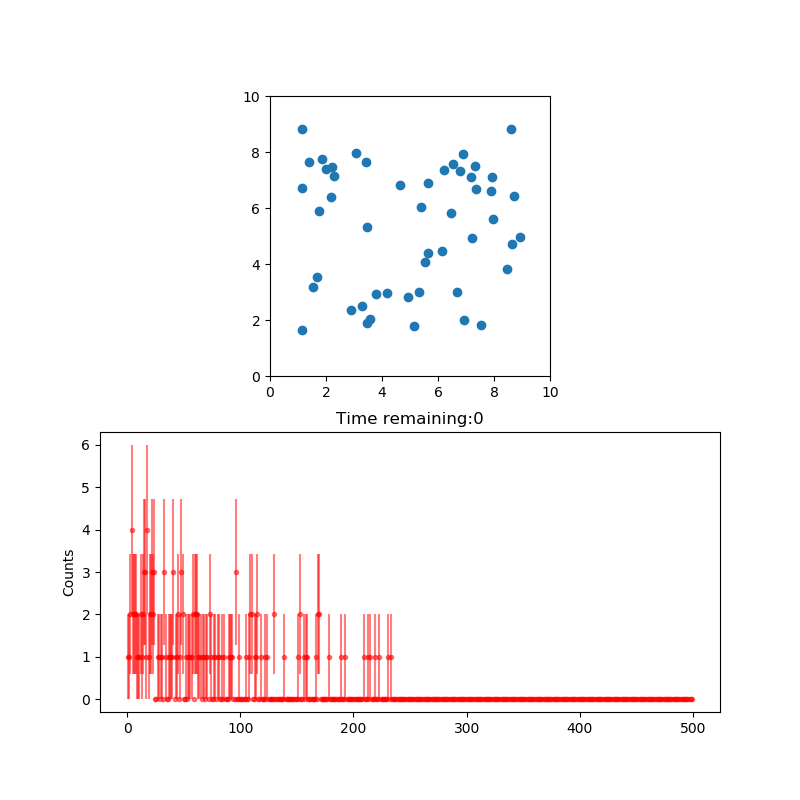

In [4]:
# %load ParticleSim.py
%matplotlib notebook 
import numpy as np #redundant

class particle:
    def __init__(self, xpos, ypos):
        self.x = xpos
        self.y = ypos
        self.t = 1 
    def __str__(self):
        return "[%s, %s, %s]\n" % (self.x,self.y,self.t)
            # This defines a particle as something that has an x and y position as well as an elapsed lifetime t
            # __str__ tells Python how to show us this data when using a print command

class particle_list:
    def __init__(self):
        self.particles = []
        self.decayed_particles = []
            # particle lists are what they sound like: a list of particles
            # decayed_particles stores all the particles that have already decayed, so that Python doesn't have to loop through them as much.
    def num_particles(self):
        return len(self.particles)
    def get_x(self):
        tx = []
        for item in self.particles:
            tx.append(item.x)
        return tx
            # returns a list of the x coordinates of all particles that haven't decayed
    def get_y(self):
        ty = []
        for item in self.particles:
            ty.append(item.y)
        return ty
    def get_t(self):
        tt = []
        for item in self.particles:
            tt.append(item.t)
        for item in self.decayed_particles:
            tt.append(item.t)
        return tt
            # returns a list of the elapsed lifetimes of all particles
    def get_paired_xy(self):
        return np.transpose([self.get_x(),self.get_y()])
            # returns particle coorinates as a list of x-y pairs
    def add_particle(self,new_x,new_y):
        self.particles.append(particle(new_x,new_y))
            # defines a function to add a new particle to the list
    def __repr__(self):
        return "%s \n" % (self.particles)
    def decay(self,rate):
        for item in self.particles:
            if(np.random.rand() <= rate):
                self.decayed_particles.append(item)
                self.particles.remove(item)
            else:
                item.t = item.t +1
            # central function: when given a rate, this iterates through all particles and either has them decay or
            # adds 1 to the ellapsed lifetime.
    def create(self,rate):
        if(np.random.rand() <= rate):
            self.add_particle(1+np.random.rand()*8,1+np.random.rand()*8)
            # defines how to add particles at a particular rate
print("Setup done")

import time
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


lst = particle_list()

plt.ion() 
    # makes the plot interactive, needed for animation
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1,figsize=(8,8)) 
    # Alternative way of initializing subplots


ax2.set_ylabel('Counts')


sc = ax1.scatter(lst.get_x(),lst.get_y())
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])
ax1.set_aspect('equal')
    # setting up a scatter plot of particles

sc2 = ax2.hist(lst.get_t())


lst.add_particle(1+np.random.rand()*8,1+np.random.rand()*8)
    # adds a sintle particle to get things started off, where 1 > x > 9 and 1 > y > 9
    # the position doesn't really do anything, it is just there for visualization purposes.
plt.draw() 

while (time.time() < t_end):
    for i in range(frame_skip):
        lst.create(add_chance)
        lst.decay(decay_chance)
        #this is the core part of the loop: maybe add a particle and then check for decays
    sc.set_offsets(lst.get_paired_xy())
        # this sets up the positions of particles in the scatterplot.
    ax2.cla()
    ax2.set_ylabel('Counts')
        # clears off the lifetime plot, resets labels
    time_data = lst.get_t()
    dat,bins = np.histogram(time_data,bins=hist_bins)
        # generates histogram data from the particle lifetimes
    ax2.errorbar(bins[0:-1],dat,np.sqrt(dat),fmt='.r',alpha=0.5)
        # makes a plot of the binned data, with square root N error bars
        # note that since numpy's histogram gives back one more bin value that data point, we need to chop one off the array
        # hence the [0:-1] notation
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True))      
        # this line force the y axis tics to be integers.  Not critical.
    plt.title("Time remaining:%i" % int(t_end - time.time()))
        # sets the title to the remaining time the sim is running
    fig.canvas.draw()
    plt.pause(0.01)
        # pause is needed, otherwise the visuals never refresh

The code above runs a simulation of decaying particles with a few user-set parameters.  Note that the number of particles is pretty low compared to the number of time bins here, so each given time only has a few decays.  The bulk of the code is in an external file; if you're particularly interested you can download it here. 

In [5]:
rebin_factor = 2

Raw Bins:
Fit Converged
Chi-square for fit:


<IPython.core.display.Math object>

Degrees of freedom:


<IPython.core.display.Math object>

Reduced chi-square:


<IPython.core.display.Math object>

Inital guess values:


<IPython.core.display.Math object>

Fit values:


<IPython.core.display.Math object>



Binned Data:
Fit Converged
Chi-square for fit:


<IPython.core.display.Math object>

Degrees of freedom:


<IPython.core.display.Math object>

Reduced chi-square:


<IPython.core.display.Math object>

Inital guess values:


<IPython.core.display.Math object>

Fit values:


<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


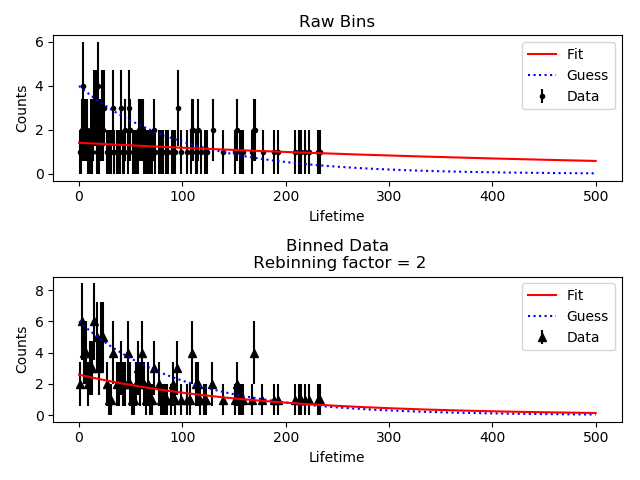

In [6]:
# %load ParticleHistogram.py
import numpy as np 

def fitfunc(p, x):
    return p[0]*np.exp(-x*p[1])
def residual(p, x, y, dy):
    return (fitfunc(p, x)-y)/dy
# defining a function to fit data with


hist_bins_rebin = hist_bins[::rebin_factor]
    # hist_bins_rebin is the new set of bins; it basically takes every nth element from the original bins.
        # n is rebin_factor in this case. 
        # for syntax see https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
dat,bins = np.histogram(time_data,bins=hist_bins)
dat2,bins2 = np.histogram(time_data,bins=hist_bins_rebin)

import numpy.ma as ma
dat_nonzero = ma.masked_less_equal(dat[0:],0)
bin_nonzero = ma.masked_array(bins[0:-1], mask=dat_nonzero.mask).compressed()
dat_nonzero = dat_nonzero.compressed()
dat2_nonzero = ma.masked_less_equal(dat2[0:],0)
bin2_nonzero = ma.masked_array(bins2[0:-1], mask=dat2_nonzero.mask).compressed()
dat2_nonzero = dat2_nonzero.compressed()
    # this whole bit serves the function of tossing out bins with zeros in them.
    # this is to keep the optimization from throwing a fit
    # see https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html

from scipy import optimize
p01 = [max(dat), decay_chance]
pf1, cov1, info1, mesg1, success1 = optimize.leastsq(residual, p01, args = (bin_nonzero,dat_nonzero,np.sqrt(dat_nonzero)), full_output=1)
    # usual code for fitting the unbinned data
    # uses max(dat) as a quick guess for how high the exponential should go

from IPython.display import display, Math
    # used to render equations in a more readible fashion
    
print("Raw Bins:")
if cov1 is None:
    print('Fit did not converge')
    print('Success code:', success1)
    print(mesg1)
else:
    print('Fit Converged')
    chisq1 = sum(info1['fvec']*info1['fvec'])
    dof1 = len(dat)-len(pf1)
    pferr1 = [np.sqrt(cov1[i,i]) for i in range(len(pf1))]
    print("Chi-square for fit:")
    display(Math(r"\chi^2 = {:.2f}".format(chisq1)))
        # the {:.2f} here denotes that the variable we name (chisq) 
        # should be shown as a floating point number (f) with two decimal places (.2)
    print("Degrees of freedom:")
    display(Math(r"d.f. = {}".format(dof1)))
    print("Reduced chi-square:")
    display(Math(r"\frac{{\chi^2}}{{d.f.}} = {:.2f}".format(chisq1/dof1)))
        # to get ipython's Math to recognize curly brackets as LaTeX formatting, you need to use pairs of them
    print('Inital guess values:')
    display(Math(r"f(t) = {}e^{{-{}t}}".format(p01[0],p01[1])))
    print('Fit values:')
    display(Math(r"f(t) = ({:.2f}\pm{:.2f})e^{{(-{:.4f}\pm{:.4f})t}}".format(pf1[0],pferr1[0],pf1[1],pferr1[1])))
        
p02 = [max(dat2), decay_chance,]
pf2, cov2, info2, mesg2, success2 = optimize.leastsq(residual, p02, args = (bin2_nonzero,dat2_nonzero,np.sqrt(dat2_nonzero)), full_output=1)
# this fits the binned data
    
    
print('\n')
print("Binned Data:")
if cov2 is None:
    print('Fit did not converge')
    print('Success code:', success1)
    print(mesg1)
else:
    

    print('Fit Converged')
    chisq2 = sum(info2['fvec']*info2['fvec'])
    dof2 = len(dat2)-len(pf2)
    pferr2 = [np.sqrt(cov2[i,i]) for i in range(len(pf2))]
    print("Chi-square for fit:")
    display(Math(r"\chi^2 = {:.2f}".format(chisq2)))
    print("Degrees of freedom:")
    display(Math(r"d.f. = {}".format(dof2)))
    print("Reduced chi-square:")
    display(Math(r"\frac{{\chi^2}}{{d.f.}} = {:.2f}".format(chisq2/dof2)))
    print('Inital guess values:')
    display(Math(r"f(t) = {}e^{{-{}t}}".format(p02[0],p02[1])))
    print('Fit values:')
    display(Math(r"f(t) = ({0:.2f}\pm{1:.2f})e^{{(-{2:.4f}\pm{3:.4f})t}}".format(pf2[0],pferr2[0],pf2[1],pferr2[1])))

fig1 = plt.figure()
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)
ax1.errorbar(bin_nonzero,dat_nonzero,np.sqrt(dat_nonzero), fmt='k.', label = 'Data')
ax2.errorbar(bin2_nonzero,dat2_nonzero,np.sqrt(dat2_nonzero), fmt='k^', label = 'Data')
# plot the data

T = np.linspace(0, time_range, time_range+1)
ax1.plot(T, fitfunc(pf1, T), 'r-', label = 'Fit', zorder=5)
ax1.plot(T, fitfunc(p01, T), 'b:', label = 'Guess', zorder=4)
ax2.plot(T, fitfunc(pf2, T), 'r-', label = 'Fit', zorder=5)
ax2.plot(T, fitfunc(p02, T), 'b:', label = 'Guess', zorder=4)
# plot the fits, along with our guesses

ax1.legend()
ax2.legend()
ax1.set_title('Raw Bins')
ax2.set_title('Binned Data\n Rebinning factor = {}'.format(rebin_factor))
ax1.set_xlabel("Lifetime")
ax2.set_xlabel("Lifetime")
ax1.set_ylabel("Counts")
ax2.set_ylabel("Counts")
plt.tight_layout()
#    plt.savefig('Decay Simulation.pdf')
plt.show()

Note that the `decay_chance` set in the first cell is the exponent you should expect to find here.  What rebinning factor is needed for your fit value to agree (within 1-2 $\sigma$ uncertainty)?

Note that the reduce $\chi^2$ values for your fits may _both_ be smaller than one, this is a function of having a whole lot of datapoints with large error bars.